ABOUT

THIS PROJECT'S DATASET CONTAINS BOTH REAL IMAGES AND ARTIFICIAL INTELLIGENCE-GENERATED IMAGES. THROUGH A SERIES OF TRAINING AND TESTING, WE NEED TO SEPARATE THE REAL AND AI-GENERATED IMAGES.

AIM

TO IDENTIFYING WHETHER AN IMAGE IS AN ARTIFICIAL INTELLIGENCE GENERATED IMAGE OR A REAL IMAGE WITH THE HELP OF ARTIFICIAL INTELLIGENCE.

IMPORTING THE DEPENDENCIES

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

NOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


UNZIPPING THE DATA SET

In [ ]:
from zipfile import ZipFile
dataset='/content/drive/MyDrive/archive (35).zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


READING THE IMAGES

In [ ]:
real_image_files=os.listdir('/content/train/REAL')
print(real_image_files[0:5])
print(real_image_files[-5:])

['0137 (10).jpg', '0268 (2).jpg', '0526 (6).jpg', '2883 (3).jpg', '3575 (4).jpg']
['0306 (10).jpg', '1689 (10).jpg', '0752 (6).jpg', '4084 (9).jpg', '4986 (4).jpg']


In [ ]:
fake_image_files=os.listdir('/content/train/FAKE')
print(fake_image_files[0:5])
print(fake_image_files[-5:])

['5749 (2).jpg', '5397 (4).jpg', '5252 (10).jpg', '2883 (3).jpg', '3575 (4).jpg']
['3042 (4).jpg', '1312 (9).jpg', '1689 (10).jpg', '4084 (9).jpg', '4986 (4).jpg']


In [ ]:
print('Number of real images:',len(real_image_files))
print('Number of fake images:',len(fake_image_files))

Number of real images: 50000
Number of fake images: 50000


EXPLORING THE IMAGE DATASET AND LABELLING THE IMAGES AS

REAL IMAGES -> 1

ARTIFICIAL INTELLIGENCE GENERATED -> 0


In [ ]:
real_image_files=[1]*50000
fake_image_files=[0]*50000

In [ ]:
print(real_image_files[0:5])
print(fake_image_files[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(real_image_files))
print(len(fake_image_files))

50000
50000


In [ ]:
labels=real_image_files + fake_image_files
print(len(labels))
print(labels[0:5])
print(labels[-5:])

100000
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


DISPLAYING THE IMAGES

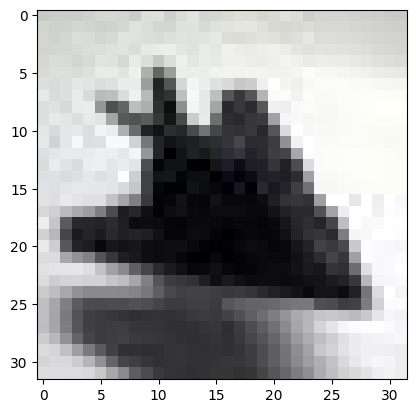

In [ ]:
img=mpimg.imread('/content/train/REAL/0000.jpg')
implot=plt.imshow(img)
plt.show()

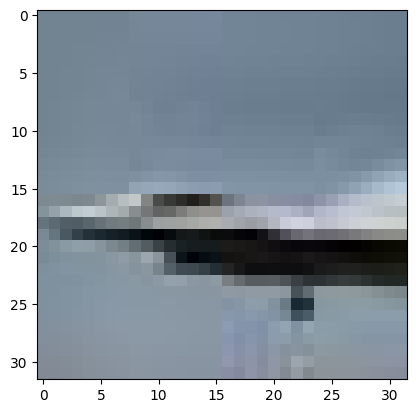

In [ ]:
img=mpimg.imread('/content/train/FAKE/1000.jpg')
implot=plt.imshow(img)
plt.show()

IMAGE PROCESSING AND CONVERTING THE IMAGES TO ARRAYS

In [ ]:
from PIL import Image

# Define the path to the folder containing the images
real_image_files = "/content/train/REAL"

# Create an empty list to store the images as NumPy
data = []

# Loop through each file in the folder
for filename in os.listdir(real_image_files):
    # Load the image using Pillow
    img = Image.open(os.path.join(real_image_files, filename))
    # Convert the image to a NumPy array and append it to the list
    data.append(np.array(img))

# Convert the list of images to a NumPy array
images_array = np.array(data)


fake_image_files = "/content/train/FAKE"
for filename in os.listdir(fake_image_files):
    # Load the image using Pillow
    img = Image.open(os.path.join(fake_image_files, filename))
    # Convert the image to a NumPy array and append it to the list
    data.append(np.array(img))

# Convert the list of images to a NumPy array
images_array = np.array(data)

In [ ]:
type(data)

list

In [ ]:
len(data)

100000

In [ ]:
data[0]

array([[[163, 189, 206],
        [166, 189, 207],
        [168, 191, 207],
        ...,
        [155, 178, 212],
        [149, 167, 205],
        [143, 158, 197]],

       [[165, 191, 208],
        [167, 193, 210],
        [172, 195, 213],
        ...,
        [148, 172, 206],
        [147, 169, 206],
        [146, 166, 203]],

       [[163, 190, 209],
        [168, 193, 213],
        [171, 197, 214],
        ...,
        [139, 170, 201],
        [139, 168, 202],
        [139, 168, 202]],

       ...,

       [[214, 207, 178],
        [216, 209, 180],
        [217, 210, 181],
        ...,
        [222, 213, 180],
        [218, 210, 174],
        [214, 206, 169]],

       [[212, 208, 181],
        [213, 209, 182],
        [215, 211, 184],
        ...,
        [218, 211, 182],
        [214, 208, 176],
        [214, 208, 176]],

       [[210, 208, 183],
        [211, 209, 184],
        [213, 211, 186],
        ...,
        [211, 204, 176],
        [210, 203, 174],
        [216, 209, 180]]

In [ ]:
len(data[0])

32

CONVERTING IMAGE LIST AND LABEL LIST TO NUMPY ARRAYS

In [ ]:
X=np.array(data)
Y=np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(100000, 32, 32, 3)
(100000,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


TRAINING THE DATA

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(100000, 32, 32, 3) (80000, 32, 32, 3) (20000, 32, 32, 3)


In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
X_train[0]

array([[[158, 169, 161],
        [168, 181, 164],
        [170, 183, 157],
        ...,
        [220, 225, 202],
        [217, 225, 202],
        [202, 211, 190]],

       [[107, 118, 110],
        [ 84,  97,  80],
        [140, 153, 127],
        ...,
        [223, 228, 205],
        [225, 233, 210],
        [227, 235, 212]],

       [[ 95, 106,  98],
        [101, 114,  97],
        [137, 150, 124],
        ...,
        [240, 244, 221],
        [243, 248, 225],
        [253, 255, 236]],

       ...,

       [[202, 217, 176],
        [201, 216, 175],
        [200, 216, 177],
        ...,
        [224, 243, 213],
        [227, 246, 216],
        [220, 239, 209]],

       [[200, 216, 177],
        [198, 214, 175],
        [196, 214, 176],
        ...,
        [217, 236, 204],
        [223, 242, 210],
        [229, 250, 219]],

       [[197, 213, 176],
        [194, 212, 174],
        [192, 210, 172],
        ...,
        [219, 240, 207],
        [215, 236, 203],
        [224, 245, 212]]

BUILDING A CONVOLUTIONAL NEURAL NETWORK (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

COMPILE THE NEURAL NETWORK

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

TRAINING THE NEURAL NETWORK

In [ ]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=8)

Epoch 1/8
2250/2250 [==============================] - 21s 5ms/step - loss: 0.3890 - acc: 0.8285 - val_loss: 0.2578 - val_acc: 0.8928
Epoch 2/8
2250/2250 [==============================] - 9s 4ms/step - loss: 0.2712 - acc: 0.8917 - val_loss: 0.2137 - val_acc: 0.9126
Epoch 3/8
2250/2250 [==============================] - 10s 4ms/step - loss: 0.2274 - acc: 0.9124 - val_loss: 0.2005 - val_acc: 0.9168
Epoch 4/8
2250/2250 [==============================] - 10s 5ms/step - loss: 0.2072 - acc: 0.9189 - val_loss: 0.1836 - val_acc: 0.9290
Epoch 5/8
2250/2250 [==============================] - 9s 4ms/step - loss: 0.1915 - acc: 0.9263 - val_loss: 0.1767 - val_acc: 0.9295
Epoch 6/8
2250/2250 [==============================] - 10s 4ms/step - loss: 0.1823 - acc: 0.9296 - val_loss: 0.1789 - val_acc: 0.9295
Epoch 7/8
2250/2250 [==============================] - 10s 4ms/step - loss: 0.1667 - acc: 0.9359 - val_loss: 0.1704 - val_acc: 0.9348
Epoch 8/8
2250/2250 [==============================] - 9s 4ms/st

MODEL EVALUATION

In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy = ',accuracy)

625/625 [==============================] - 1s 2ms/step - loss: 0.2097 - acc: 0.9161
Test Accuracy =  0.916100025177002


PLOT THE LOSS VALUE

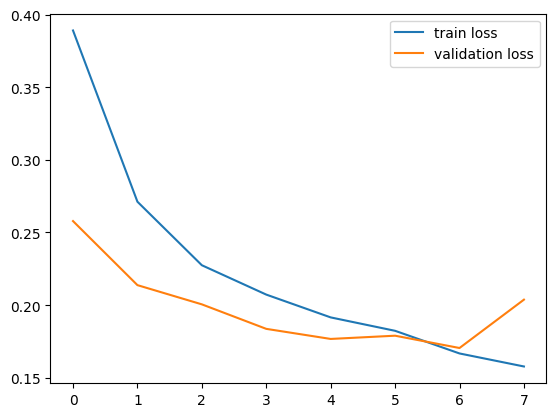

In [ ]:
h=history

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

PLOT THE ACCURACY VALUE

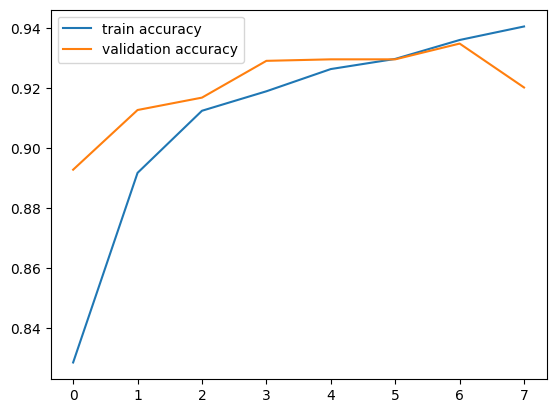

In [ ]:
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

PREDICTIVE SYSTEM


Path of the image to be predicted: /content/test/FAKE/1.jpg


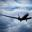

1/1 [==============================] - 0s 172ms/step
[[0.97187537 0.350615  ]]
0
THE IMAGE IS ARTIFICIAL INTELLIGENCE GENERATED


In [ ]:
input_image_path=input('Path of the image to be predicted: ')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(32,32))

input_image_scaled=input_image_resized/255

input_image_reshaped=np.reshape(input_image_scaled,[1,32,32,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==1:
  print('THE IMAGE IS REAL')
else:
  print('THE IMAGE IS ARTIFICIAL INTELLIGENCE GENERATED')

AFTER TRAINING, A FAKE IMAGE FROM TEST FOLDER IS ADDED TO TEST THE IMAGE.

AND THE TEST RESULT SHOWS THAT THE IMAGE IS ARTIFICIAL INTELLIGENCE GENERATED.

Path of the image to be predicted: /content/test/REAL/0000.jpg


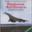

1/1 [==============================] - 0s 20ms/step
[[0.37024537 0.5684431 ]]
1
THE IMAGE IS REAL


In [ ]:
input_image_path=input('Path of the image to be predicted: ')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(32,32))

input_image_scaled=input_image_resized/255

input_image_reshaped=np.reshape(input_image_scaled,[1,32,32,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==1:
  print('THE IMAGE IS REAL')
else:
  print('THE IMAGE IS ARTIFICIAL INTELLIGENCE GENERATED')

AFTER TRAINING, A REAL IMAGE FROM TEST FOLDER IS ADDED TO TEST THE IMAGE.

AND THE TEST RESULT SHOWS THAT THE IMAGE IS REAL.

# ***SO THE PREDICTION IS CORRECT AND THE TRAINING IS A SUCCESS.***